In [59]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [5]:
input = np.load('input.npy')
output = np.load('output.npy')

# Problem 1
## Problem 1.1

In [52]:
bad_train_x = input[input < 0]
bad_train_y = output[input < 0]
bad_test_x = input[input > 0]
bad_test_y = output[input > 0]

In [53]:
# Part (i)
linear_model = LinearRegression(copy_X=True)
linear_fit = linear_model.fit(bad_train_x.reshape((-1, 1)), bad_train_y)
a = linear_fit.coef_
b = linear_fit.intercept_
a, b

(array([-0.01043025]), 2.587127168868936)

('Mean Squared Error on Training', 0.0330221626435983)

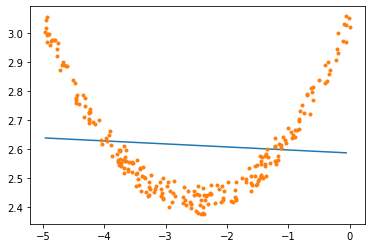

In [70]:

plot_x = np.arange(bad_train_x.min(), bad_train_x.max(), 0.1)
plot_y = a*plot_x + b
y_pred = linear_model.predict(bad_train_x.reshape((-1,1)))
plt.plot(plot_x, plot_y)                # Plots line
plt.plot(bad_train_x, bad_train_y, '.') # Plots training points
mean_squared_error(y_pred, bad_train_y) # Mean squared error of Linear fit on training data

### Answer to (i):
Our line fits the training data well for a linear fit (as well as a linear one can do anyways). Our training loss for mean squared error (MSE) is 0.033 which is not too shabby.

8.832697367127995

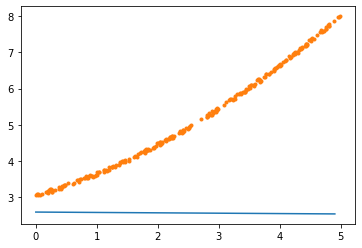

In [75]:
# Part (ii)
plot_x = np.arange(bad_test_x.min(), bad_test_x.max(), 0.1)
plot_y = a*plot_x + b
plt.plot(plot_x, plot_y)
plt.plot(bad_test_x, bad_test_y, '.')
y_pred = linear_model.predict(bad_test_x.reshape((-1,1)))
mean_squared_error(y_pred, bad_test_y)

### Answer (ii):
Our line completely messes up on the test data. The test loss has an MSE of 8.833 which is really bad. 

In [110]:
# Part (iii)
splitting = train_test_split(input, output)
train_x = splitting[0]
train_y = splitting[2]
test_x = splitting[1]
test_y = splitting[3]

0.559168018979291

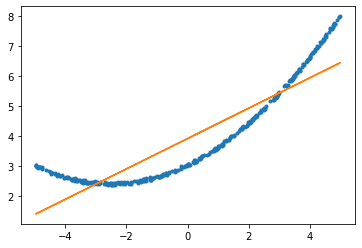

In [111]:
linear_model_random = LinearRegression()
linear_model_random.fit(train_x.reshape((-1,1)), train_y)

y_pred = linear_model_random.predict(train_x.reshape((-1,1)))
plt.plot(train_x, train_y, ".")
plt.plot(train_x, y_pred)
mean_squared_error(y_pred, train_y)

0.46502651518945853

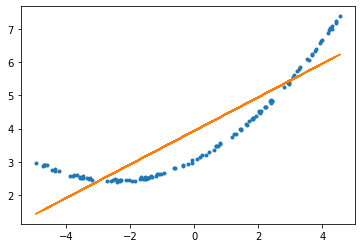

In [113]:
y_pred = linear_model_random.predict(test_x.reshape((-1,1)))
plt.plot(test_x, test_y, ".")
plt.plot(test_x, y_pred)
mean_squared_error(y_pred, test_y)

### Answer (iii):
Yes the line fits better as now we can see that the MSE is much closer to the same as the training one (which means we correctly sampled the same distribution as our testing set). For my example, I had training MSE around 0.559 and test MSE at 0.465. In this case, the line fits the test_x better, but I think that'sjust because it is more likely to sample in the middle of the curve which is where the values are closer to the line.

## Problem 1.2 Kernals-I

In [118]:
def kernal(x):
    return np.array([x**2, x]).T

In [127]:
new_x = kernal(input)[:5]
tts = train_test_split(new_x, output[:5])
tts

[array([[16.72132661,  4.08917187],
        [ 0.13948825, -0.37348126],
        [ 2.24968309, -1.49989436]]),
 array([[12.63181026, -3.55412581],
        [ 0.03508628, -0.18731333]]),
 array([6.77152749, 2.83665043, 2.49018143]),
 array([2.5514202 , 2.93378142])]